In [1]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import cv2
import requests
import re
import urllib2
import os
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import *
%matplotlib inline

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
image_list = []
size_list = [128,96,64,32,16]
for i1 in range(1,5):    
    for i2 in range(1,5):
        for i3 in range(0,1):
            image_name = "/home/wutong/Desktop/AllImage/AllImage/%03d_%02d_128_%02d.png"% (i1,i2,i3)
            image_list.append(image_name)
for i1 in range(6,125):
    for i2 in range(1,5):
        for i3 in range(0,5):
            image_name = "/home/wutong/Desktop/AllImage/AllImage/%03d_%02d_128_%02d.png"% (i1,i2,i3)
            image_list.append(image_name)
        
test_image_list = []
for i1 in range(1,5):    
    for i2 in range(5,7):
#         image_name = "/home/wutong/Dataset/CASIA/DatasetB/GEI/nm/GEI_%03d-nm-%02d-090.png"% (i1,i2)
#         test_image_list.append(image_name) 
        image_name = "/home/wutong/Desktop/AllImage/AllImage/%03d_%02d_016_00.png"% (i1,i2)
        test_image_list.append(image_name)##001_01_016_00.png
for i1 in range(6,125):
    for i2 in range(5,7):
        image_name = "/home/wutong/Desktop/AllImage/AllImage/%03d_%02d_016_00.png"% (i1,i2)
        test_image_list.append(image_name)


In [3]:
def img_to_matrix(img, verbose=False):
    """
    takes a filename and turns it into a numpy array of RGB pixels
    """
    img = cv2.imread(img,cv2.CV_8UC1)
    if verbose==True:
        print "changing size from %s to %s" % (str(img.size), str(STANDARD_SIZE))

    img = list(img)
    img = map(list, img)
    img = np.array(img)
    return img

def flatten_image(img):
    """
    takes in an (m, n) numpy array and flattens it 
    into an array of shape (1, m * n)
    """
    s = img.shape[0] * img.shape[1]
    img_wide = img.reshape(1, s)
    return img_wide[0]

In [4]:
train_image = []
for image in image_list:
    
    img = img_to_matrix(image)
    img = flatten_image(img)
    train_image.append(img)
len(train_image)
test_image = []
for image in test_image_list:

    img = cv2.imread(image,cv2.CV_8UC1)
  
    img = img_to_matrix(image)
    img = flatten_image(img)
    test_image.append(img)



In [5]:
count = 0
label = []
for i,image in enumerate(image_list):
    label.append(count)
    if (i+1)%(4*5) == 0:
        count = count + 1


In [6]:
neigh = KNeighborsClassifier(n_neighbors=1)

In [7]:
neigh.fit(train_image, label) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=1, p=2, weights='uniform')

In [8]:
count = 0
true_label = []
for i,image in enumerate(test_image_list):
    true_label.append(count)
    if (i+1)%2 == 0:
        count = count + 1


In [9]:
correct = 0.0
for i,image in enumerate(test_image_list):
    predit = neigh.predict(test_image[i])[0]
    print "label:%d, predict:%d" % (true_label[i],predit)
    if predit == true_label[i]:
        correct = correct + 1
acc = correct / len(test_image_list)
print acc

ValueError: query data dimension must match training data dimension

In [111]:
acc_ann =[0.951219512195,0.951219512195,0.951219512195,0.955284552846,0.947154471545,0.947154471545]
err_ann = [1-acc for acc in acc_ann]
err_ann

[0.048780487804999995,
 0.048780487804999995,
 0.048780487804999995,
 0.044715447154,
 0.05284552845500001,
 0.05284552845500001]

In [108]:
accu_caffe = [0.959349593496,0.959349593496,0.951219512195,0.943089430894,0.926829268293,0.882113821138]
err_caffe  = [1-acc for acc in accu_caffe]

In [84]:
n = [0,5,10,15,20,24]
# noi = [0,5,10,15,20,24]

In [115]:
err_ann   = np.array(err_ann)
err_caffe = np.array(err_caffe)
np_x = np.array(range(6))

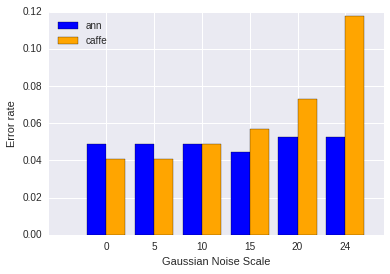

In [130]:
bar_width = 0.4
plt.bar(np_x,err_ann,color="blue",width=bar_width,label="ann",align = "center")
plt.bar(np_x+bar_width,err_caffe,color="orange",width=bar_width,label="caffe",align = "center")
plt.legend(loc = "best")
plt.xticks(np_x + bar_width / 2, n)
plt.xlabel("Gaussian Noise Scale")
plt.ylabel("Error rate")



In [1]:
acc_32 = [0.89837398374,0.886178861789,0.853658536585,0.833333333333,0.79674796748,0.723577235772]

In [4]:
n = [0,5,10,15,20,24]
acc_32   = np.array(acc_32)
np_x = np.array(range(6))

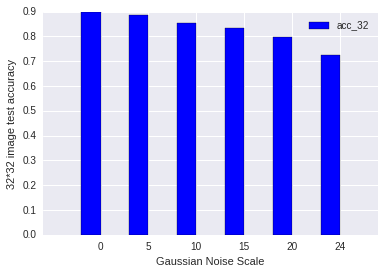

In [6]:
bar_width = 0.4
plt.bar(np_x,acc_32,color="blue",width=bar_width,label="acc_32",align = "center")
plt.legend(loc = "best")
plt.xticks(np_x + bar_width / 2, n)
plt.xlabel("Gaussian Noise Scale")
plt.ylabel("32*32 image test accuracy")